In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

In [2]:
x_df = pd.read_csv('../data/processed/processed_x_dataset.csv')
reddit_df = pd.read_csv('../data/processed/processed_reddit_dataset.csv')

In [3]:
x_df['source'] = "x"

In [4]:
del reddit_df['Unnamed: 0']

reddit_df['source'] = "reddit"

In [5]:
reddit_df.columns

Index(['processed_text', 'label', 'source'], dtype='object')

In [6]:
print(f"Length of the x dataset: {len(x_df)}, length of the reddit dataset: {len(reddit_df)}")
df = pd.concat([x_df, reddit_df])
print(len(df))
df = df.iloc[:, [0, 2, 1]]


Length of the x dataset: 2042, length of the reddit dataset: 44517
46559


In [7]:
df['processed_text'].duplicated().sum()

27501

In [8]:
df.drop_duplicates(subset=['processed_text'], inplace=True)

In [9]:
len(df)

19058

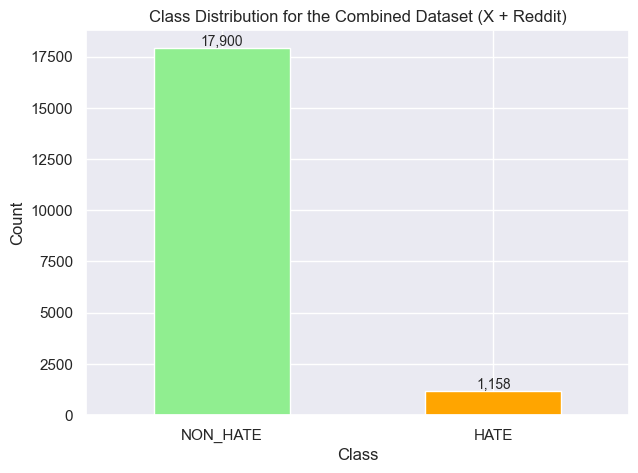

In [10]:
class_count = df['label'].value_counts()
plt.figure(figsize=(7,5))
bars = class_count.plot(kind='bar', color=['lightgreen','orange'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
    
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for the Combined Dataset (X + Reddit)")
plt.xticks(rotation=0)
plt.show()

kaggle dataset taken from https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset
currently not a part of this repo since it has 138.40 MB which exceeds GitHub's file size limit of 100.00 MB

In [11]:
k_df = pd.read_csv('../data/processed/processed_kaggle_dataset.csv')
k_df['source'] = 'kaggle'
k_df['label'] = k_df['label'].map({1:"HATE", 0:"NON_HATE"})
k_df['label'].value_counts()

label
HATE        358561
NON_HATE    341506
Name: count, dtype: int64

In [12]:
hate_speech = k_df[k_df['label'] == 'HATE']
not_hate = k_df[k_df['label'] == 'NON_HATE']

hate_sample = hate_speech.sample(n=20000, random_state=42)
non_hate_sample = not_hate.sample(n=2000, random_state=42)


_k_df = pd.concat([hate_sample, non_hate_sample])
_k_df['label'].value_counts()

label
HATE        20000
NON_HATE     2000
Name: count, dtype: int64

In [ ]:
df = pd.concat([df, _k_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df['label'].value_counts()
df


,processed_text,source,label
0,pamela anderson article joy stall want enterta...,kaggle,NON_HATE
1,know signed law effect trump trump signed law ...,reddit,HATE
2,not saying saying mean harm not lesbian femini...,reddit,NON_HATE
3,far right party never actually solve immigrati...,reddit,NON_HATE
4,interesting actually not seen many people labe...,reddit,NON_HATE
...,...,...,...
41052,lesbian bar random wednesday thursday lady nig...,reddit,NON_HATE
41053,equal not better,reddit,NON_HATE
41054,hoping wikipedia not biased,kaggle,HATE
41055,thou wilt walk david thy father walked integri...,x,NON_HATE


In [14]:
df['label'] = df['label'].map({"HATE":1, "NON_HATE":0})
df

,processed_text,source,label
0,pamela anderson article joy stall want enterta...,kaggle,0
1,know signed law effect trump trump signed law ...,reddit,1
2,not saying saying mean harm not lesbian femini...,reddit,0
3,far right party never actually solve immigrati...,reddit,0
4,interesting actually not seen many people labe...,reddit,0
...,...,...,...
41052,lesbian bar random wednesday thursday lady nig...,reddit,0
41053,equal not better,reddit,0
41054,hoping wikipedia not biased,kaggle,1
41055,thou wilt walk david thy father walked integri...,x,0


In [16]:
df.to_csv('../data/final/final_df.csv', index=False)